### Mark Hoogendoorn and Burkhardt Funk (2017)              
Machine Learning for the Quantified Self               
Springer,
Chapter 7    

In [33]:
from util.VisualizeDataset import VisualizeDataset
from Chapter7.PrepareDatasetForLearning import PrepareDatasetForLearning
from Chapter7.LearningAlgorithms import ClassificationAlgorithms
from Chapter7.LearningAlgorithms import RegressionAlgorithms
from Chapter7.Evaluation import ClassificationEvaluation
from Chapter7.Evaluation import RegressionEvaluation
from Chapter7.FeatureSelection import FeatureSelectionClassification
from Chapter7.FeatureSelection import FeatureSelectionRegression
import copy
import pandas as pd
from util import util
import matplotlib.pyplot as plot
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import os

In [34]:
DataViz = VisualizeDataset()

# Read the result from the previous chapter, and make sure the index is of the type datetime.

dataset_path = 'intermediate_datafiles/'
export_tree_path = 'Example_graphs/Chapter7/'

try:
    dataset = pd.read_csv(dataset_path + 'chapter5_result.csv', index_col=0)
    dataset_bf = pd.read_csv(dataset_path + 'chapter4_result_bf.csv', index_col=0)
except IOError as e:
    print('File not found, try to run previous crowdsignals scripts first!')
    raise e

if not os.path.exists(export_tree_path):
    os.makedirs(export_tree_path)

dataset.index = dataset.index.to_datetime()
dataset_bf.index = dataset_bf.index.to_datetime()

C:\Users\davee\Anaconda3\envs\ml4qs\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)
C:\Users\davee\Anaconda3\envs\ml4qs\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)


In [35]:
bench = dataset[list(dataset_bf)][dataset[list(dataset_bf)]['labelBenchPress'] == 1]

In [36]:
dataset = pd.concat([bench[:250], dataset_bf])

In [37]:
del dataset['participant']
del dataset['set']
del dataset['labelBenchPress']
del dataset['labelDeadlift']
del dataset['labelOHP']
del dataset['labelSquat']
del dataset['labelRow']
del dataset['labelRest']

In [38]:
dataset['category'] = dataset['category'].apply(lambda x: 'good' if x == 'heavy' or x == 'medium' else x)

In [39]:
dataset.dropna(inplace=True)

In [40]:
X = dataset.drop('category', axis=1)
y = dataset['category']

In [41]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3)

In [42]:
# Select subsets of the features that we will consider:

basic_features = ['acc_x','acc_y','acc_z', 'gyr_x','gyr_y','gyr_z', 'acc_r', 'gyr_r']
time_features = [name for name in dataset.columns if '_temp_' in name]
freq_features = [name for name in dataset.columns if (('_freq' in name) or ('_pse' in name))]
print '#basic features: ', len(basic_features)
print '#time features: ', len(time_features)
print '#frequency features: ', len(freq_features)
features_after_chapter_3 = list(set().union(basic_features))
features_after_chapter_4 = list(set().union(basic_features, time_features, freq_features))

#basic features:  8
#time features:  16
#frequency features:  58


In [43]:
selected_features = ['gyr_r_freq_0.0_Hz_ws_50', 'acc_z_temp_mean_ws_5', 'acc_y_temp_std_ws_5', 'acc_x', 
                   'acc_r_freq_0.5_Hz_ws_50', 'gyr_r_pse', 'acc_r_freq_0.4_Hz_ws_50', 'gyr_r_freq_2.0_Hz_ws_50', 
                   'acc_r_freq_1.2_Hz_ws_50', 'acc_r_temp_std_ws_5']

In [44]:
learner = ClassificationAlgorithms()
eval = ClassificationEvaluation()

In [45]:
# And we study two promising ones in more detail. First let us consider the random forrest which works best with the selected
# features.

class_train_y, class_test_y, class_train_prob_y, class_test_prob_y, model = learner.random_forest(train_X[selected_features], train_y, test_X[selected_features],
                                                                                           gridsearch=True, print_model_details=True)

{'n_estimators': 100, 'criterion': 'entropy', 'min_samples_leaf': 2}
Feature importance random forest:
gyr_r_freq_0.0_Hz_ws_50  &  0.310208765212
acc_z_temp_mean_ws_5  &  0.187526924436
acc_x  &  0.143207008288
gyr_r_pse  &  0.0769566829428
acc_r_temp_std_ws_5  &  0.0549189585318
acc_r_freq_0.5_Hz_ws_50  &  0.0541457262372
acc_y_temp_std_ws_5  &  0.0499408404085
acc_r_freq_1.2_Hz_ws_50  &  0.0480636669514
acc_r_freq_0.4_Hz_ws_50  &  0.0475704030658
gyr_r_freq_2.0_Hz_ws_50  &  0.0274610239269


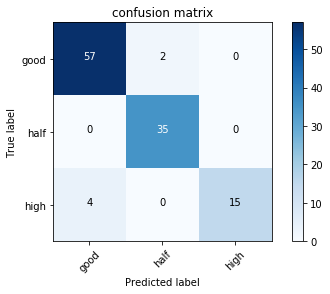

In [46]:
test_cm = eval.confusion_matrix(test_y, class_test_y, class_train_prob_y.columns)
DataViz.plot_confusion_matrix(test_cm, class_train_prob_y.columns, normalize=False)

In [47]:
cm = confusion_matrix(test_y, class_test_y, class_train_prob_y.columns)
cr = classification_report(test_y, class_test_y, class_train_prob_y.columns)
accuracy_score(test_y, class_test_y)

0.94690265486725667